In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn

In [4]:
Smarket = pd.read_csv('../Data/Smarket.csv', index_col=0)

In [7]:
Smarket.dtypes

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object

In [9]:
print(Smarket['Direction'].value_counts())
Smarket.describe()

Up      648
Down    602
Name: Direction, dtype: int64


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


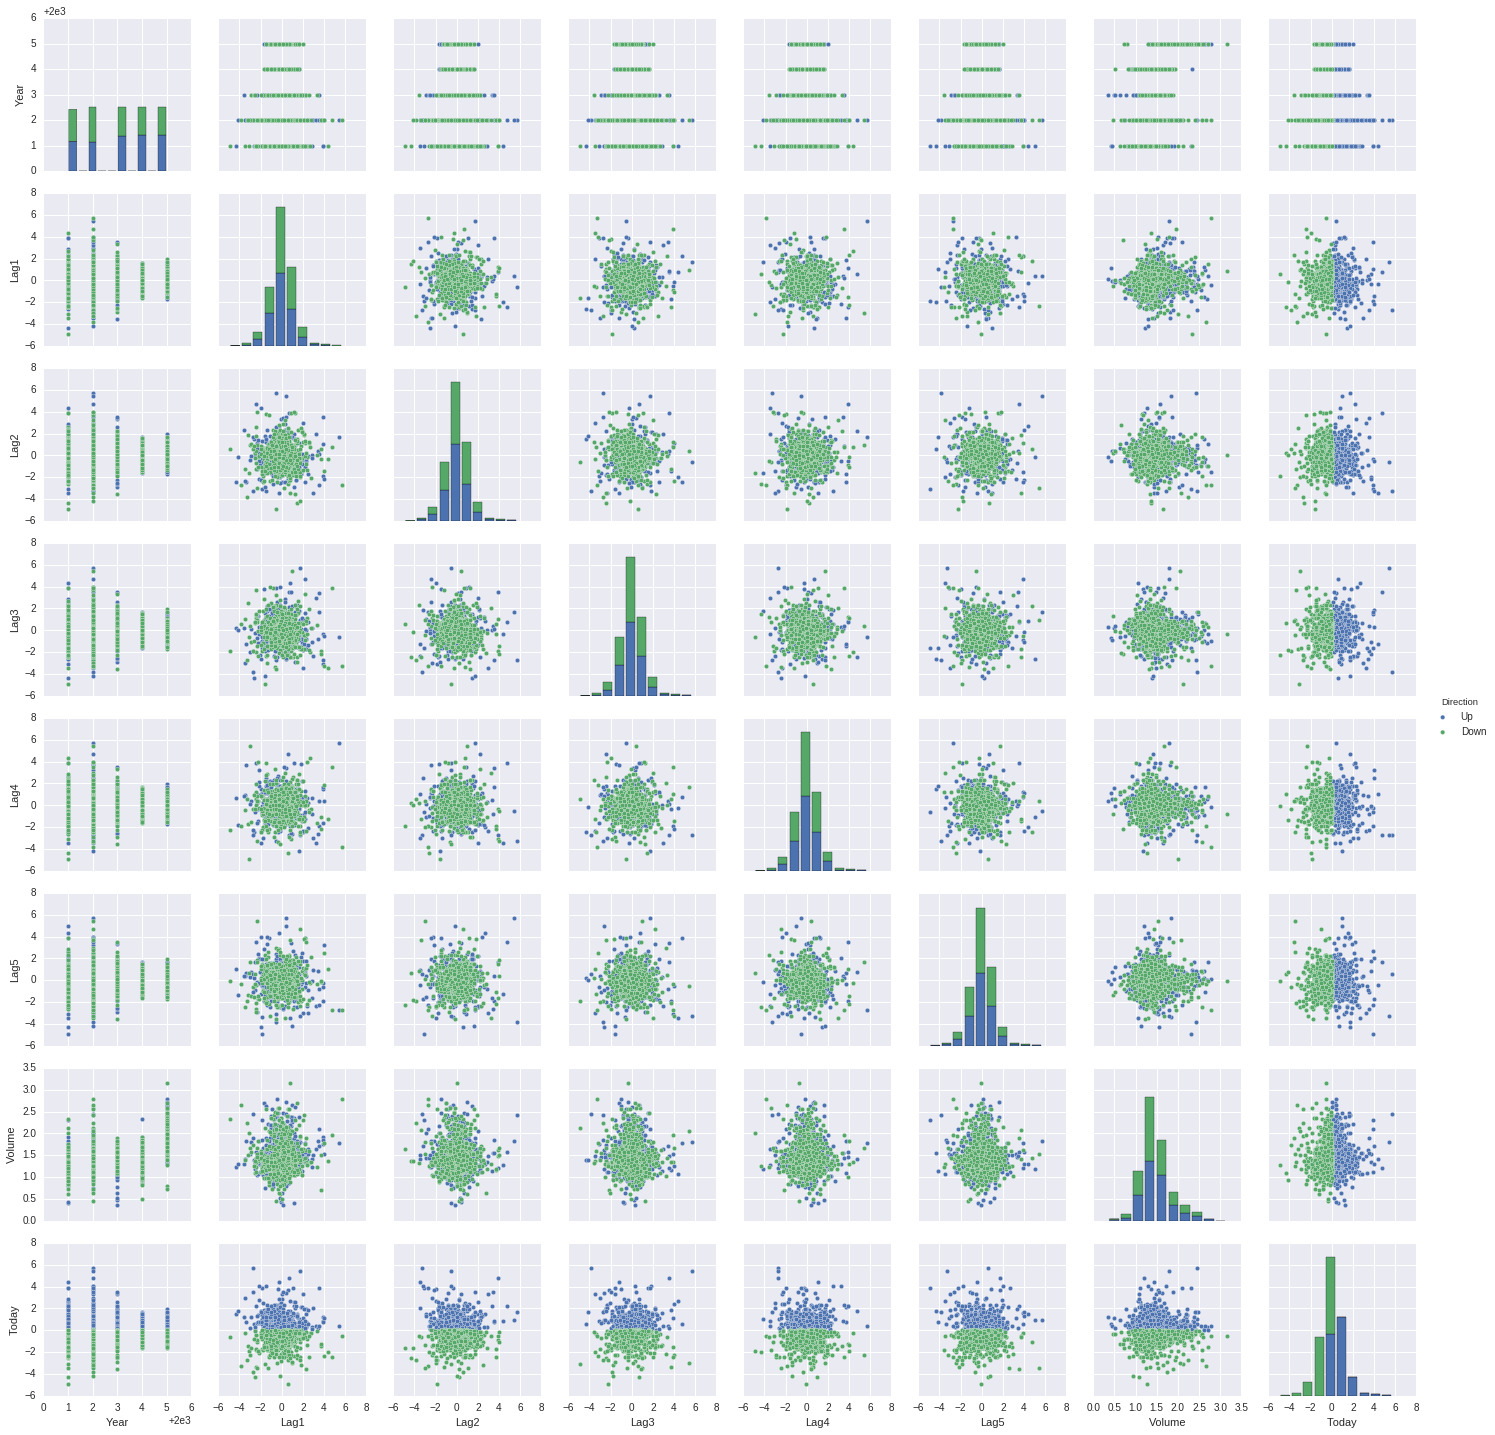

In [10]:
sns.pairplot(Smarket, hue= 'Direction')

In [15]:
# fit the logistic model
endog = Smarket['Direction'] == 'Up'
exog = sm.add_constant(Smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])
logit = sm.Logit(endog, exog)
res = logit.fit()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


In [22]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Mon, 28 Mar 2016   Pseudo R-squ.:                0.002074
Time:                        12:55:10   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601        -0.598     0.346
Lag1          -0.0731      0.050     -1.457      0.145        -0.171     0.025
Lag2          -0.0423      0.050     -0.845      0.3

In [51]:
#predictions = res.predict() > 0.5 # false = predicted down
predictions = pd.Series([p>0.5 for p in res.predict()]).rename('predicted') # false = predicted down
predictions.index += 1 # pandas indexes at 0
pd.crosstab( predictions, Smarket['Direction'])

Direction,Down,Up
predicted,,
False,145,141
True,457,507


In [63]:
(predictions == (Smarket['Direction']=='Up')).mean()

0.52159999999999995

In [69]:
# train vs test
train = Smarket[Smarket['Year'] < 2005]
test = Smarket[Smarket['Year'] >= 2005]

In [79]:
# fit the logistic model
train_endog = train['Direction'] == 'Up'
train_exog = sm.add_constant(train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])
test_endog = test['Direction'] == 'Up'
test_exog =  sm.add_constant(test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])
logit = sm.Logit(train_endog, train_exog)
res = logit.fit()

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


In [80]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Mon, 28 Mar 2016   Pseudo R-squ.:                0.001562
Time:                        14:23:30   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
                                        LLR p-value:                    0.9044
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1912      0.334      0.573      0.567        -0.463     0.845
Lag1          -0.0542      0.052     -1.046      0.295        -0.156     0.047
Lag2          -0.0458      0.052     -0.884      0.3

In [82]:
test_probabilities = res.predict(test_exog)
test_predictions = test_probabilities > 0.5
pd.crosstab(test_predictions, test_endog)

Direction,False,True
row_0,,
False,77,97
True,34,44


In [83]:
(test_predictions==test_endog).mean()

0.48015873015873017

In [84]:
# creating the small model
small_train_exog = sm.add_constant(train[['Lag1', 'Lag2']])
small_test_exog =  sm.add_constant(test[['Lag1', 'Lag2']])
logit = sm.Logit(train_endog, small_train_exog)
res = logit.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  998
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            2
Date:                Mon, 28 Mar 2016   Pseudo R-squ.:                0.001347
Time:                        14:26:22   Log-Likelihood:                -690.70
converged:                       True   LL-Null:                       -691.63
                                        LLR p-value:                    0.3939
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0322      0.063      0.508      0.611        -0.092     0.156
Lag1          -0.0556      0.

In [87]:
small_test_probabilities = res.predict(small_test_exog)
small_test_predictions = small_test_probabilities > 0.5
pd.crosstab(small_test_predictions, test_endog)

Direction,False,True
row_0,,
False,35,35
True,76,106


In [88]:
(small_test_predictions == test_endog).mean()

0.55952380952380953

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [101]:
X_train = train[['Lag1','Lag2']].values
y_train = train['Direction'].values
clf1 = LinearDiscriminantAnalysis().fit(X_train, y_train)
#clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X.values, y.values)

In [102]:
print('Class Means')
print(clf1.means_)
print("priors")
print(clf1.priors_)
print("parameter coefs")
print(clf1.coef_)

Class Means
[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
priors
[ 0.49198397  0.50801603]
parameter coefs
[[-0.05544078 -0.0443452 ]]


In [104]:
X_test = test[['Lag1','Lag2']].values
y_test = test['Direction'].values
y_hat = clf1.predict(X_test)

In [107]:
pd.crosstab(y_hat,y_test)

col_0,Down,Up
row_0,,
Down,35,35
Up,76,106


In [109]:
(y_hat==y_test).mean()

0.55952380952380953

In [111]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [112]:
y_hat = neigh.predict(X_test)
pd.crosstab(y_hat,y_test)

col_0,Down,Up
row_0,,
Down,43,58
Up,68,83


In [114]:
(y_hat==y_test).mean()

0.5